# Transcriptomics analysis by matrix factorization

In [16]:
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [17]:
sys.path += ['../Src']

In [18]:
import importlib
import factor_clustering
importlib.reload(factor_clustering)
from factor_clustering import FactorClustering
from factorizer_wrappers import NMF_Factorizer, ICA_Factorizer, PCA_Factorizer

$V_t = W_tH_t $

## Perform multiple bootstrap repeat calculations of ICA, NMF and PCA and look at clustering

In [19]:
possible_datasets = {1: 'Mini_AOCS',
                     2: 'AOCS_Protein', 
                     3: 'TCGA_OV_VST', 
                     4: 'Canon_N200'}

fc = FactorClustering(possible_datasets[3], n_repeats=50, method='bootstrap')
print("Starting analysis for", fc.basename)
print("Method:", fc.method)

fc.read_expression_matrix()

all_factos = [NMF_Factorizer, ICA_Factorizer, PCA_Factorizer]

Starting analysis for TCGA_OV_VST
Method: bootstrap
19601 genes
374 patients


## Computation and caching of bootstrapped samples
For each of NMF, ICA and PCA We compute and cache 50 repeat factorizations over a range of component numbers.  A bootstrap sample is created having same number of patients, sampled *with* replacement.

In [20]:
nc_list = range(2, 14)

In [21]:
if True:
    # Beware - this could take hours (for the full size dataset)!
    fc.compute_and_cache_multiple_factor_repeats(nc_list, force=False)

All Done.


## t-SNE plots per factorization method
These demonstrate visually how robust are the factors.  The median point for each cluster is indicated with a black '+'.

............

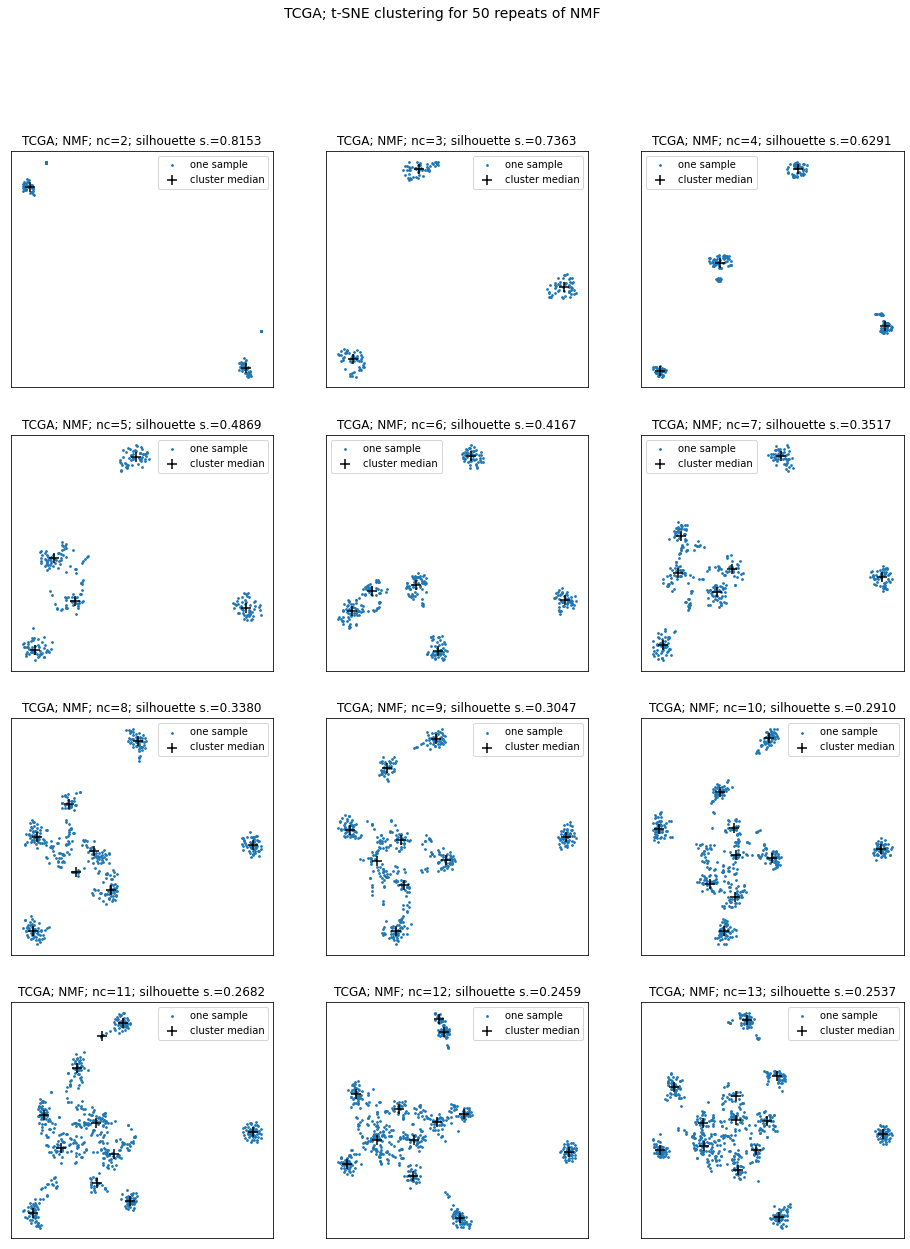

In [22]:
if True:
    fc.plot_multiple_single_factors_scatter(NMF_Factorizer, nc_list)

............

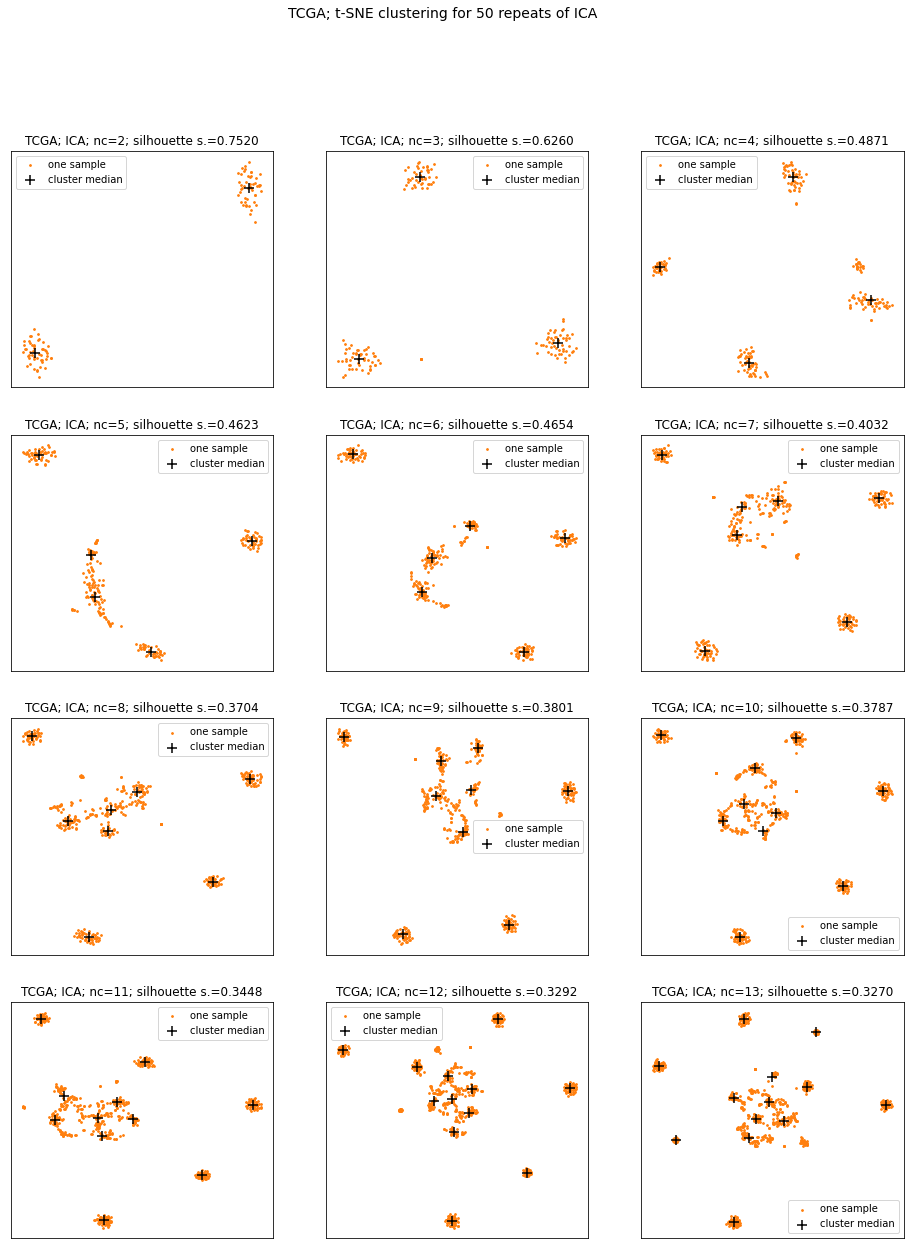

In [23]:
if True:
    fc.plot_multiple_single_factors_scatter(ICA_Factorizer, nc_list)

............

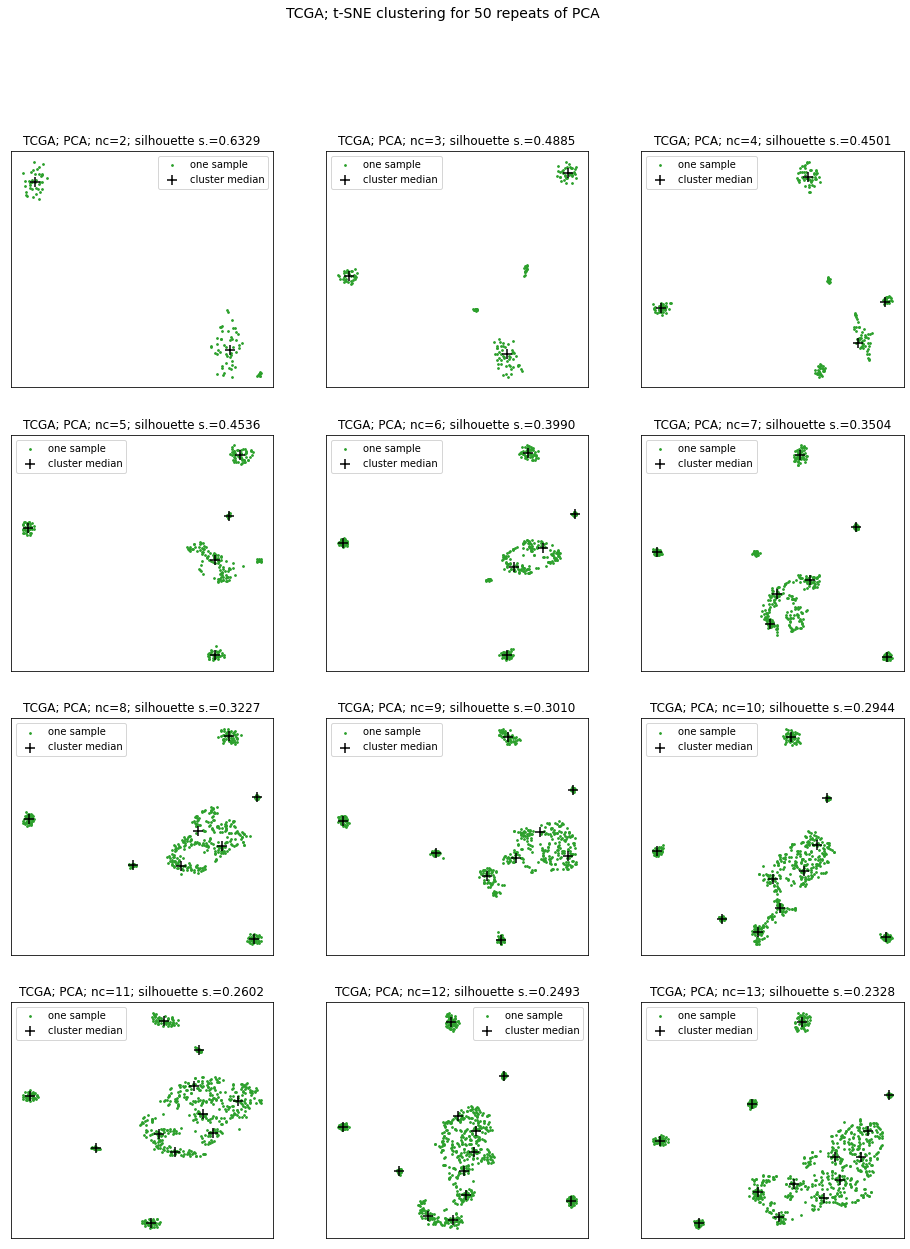

In [24]:
if True:
    fc.plot_multiple_single_factors_scatter(PCA_Factorizer, nc_list)

## t-SNE plots of all three methods together

............

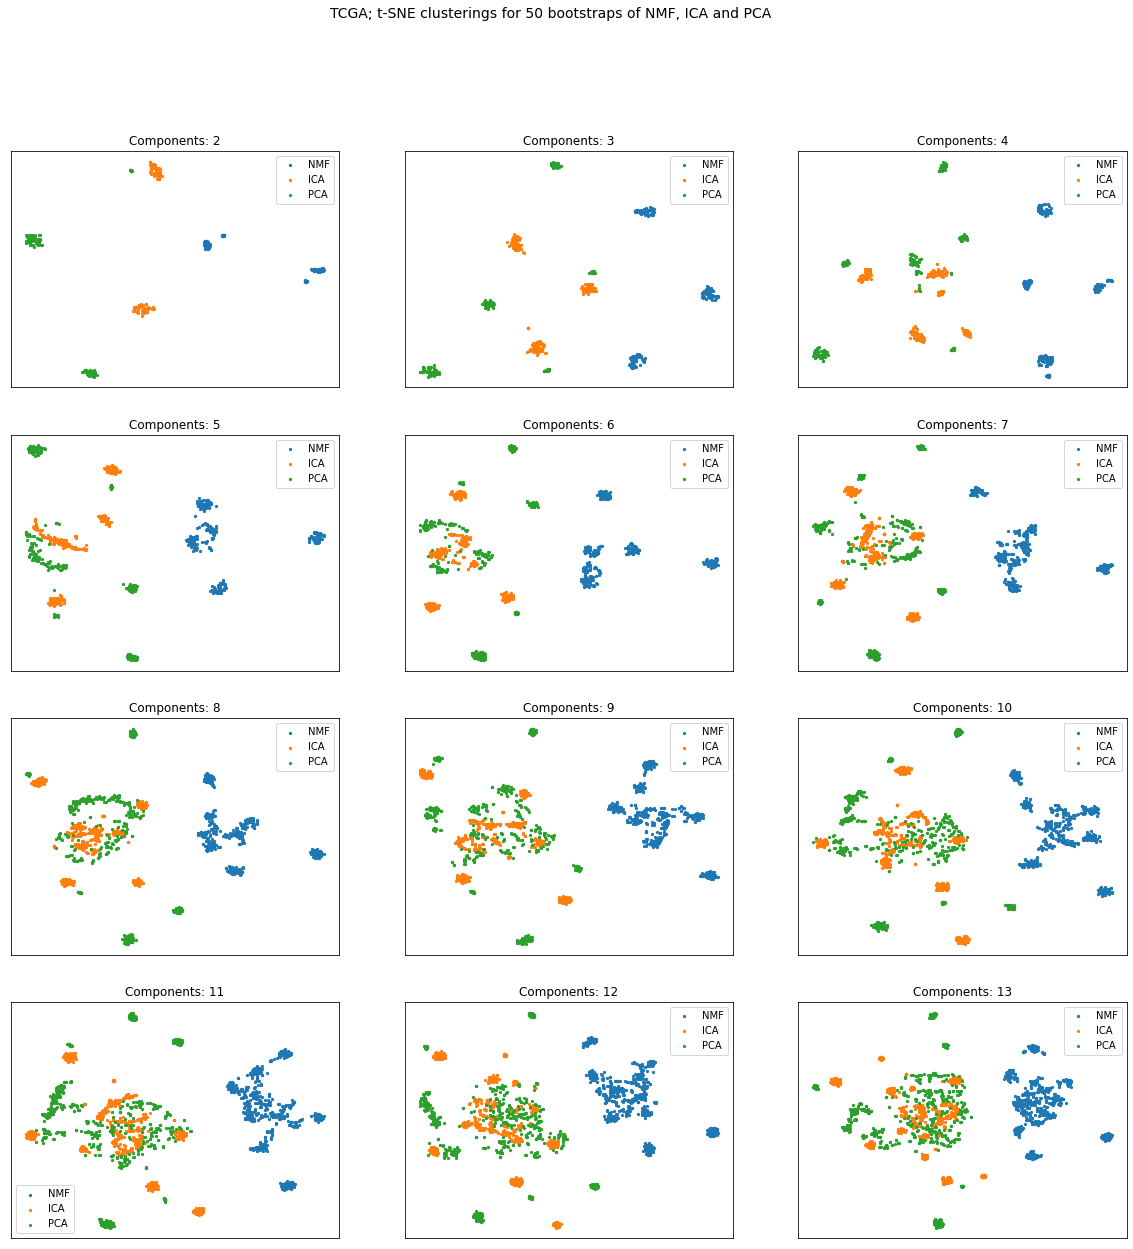

In [25]:
if True:
    fc.plot_multiple_combined_factors_scatter(nc_list)

## Silhouette plots
These indicate robustness of clusters for each number of components.

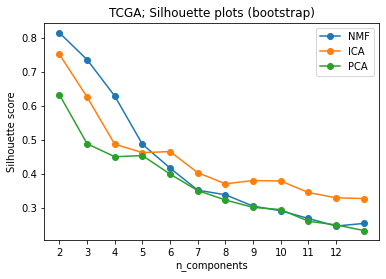

In [26]:
if True:
    fc.plot_silhouette_scores(nc_list, show=True)  
    

In [27]:
if True:
    fc.save_multiple_median_metagenes_to_factors(NMF_Factorizer, nc_list)
    fc.save_multiple_median_metagenes_to_factors(ICA_Factorizer, nc_list)
    fc.save_multiple_median_metagenes_to_factors(PCA_Factorizer, nc_list)

13